In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
!pip install plotly
import plotly.express as px
import json

# Load Data

In [29]:
BR_df = pd.read_csv('final/BR_youtube_trending_data.csv')
CA_df = pd.read_csv('final/CA_youtube_trending_data.csv')
DE_df = pd.read_csv('final/DE_youtube_trending_data.csv')
FR_df = pd.read_csv('final/FR_youtube_trending_data.csv')
GB_df = pd.read_csv('final/GB_youtube_trending_data.csv')
IN_df = pd.read_csv('final/IN_youtube_trending_data.csv')
JP_df = pd.read_csv('final/JP_youtube_trending_data.csv')
KR_df = pd.read_csv('final/KR_youtube_trending_data.csv')
MX_df = pd.read_csv('final/MX_youtube_trending_data.csv')
RU_df = pd.read_csv('final/RU_youtube_trending_data.csv')
US_df = pd.read_csv('final/US_youtube_trending_data.csv')

Load Category from JSON

In [30]:
categories = pd.read_json("final/US_category_id.json")

In [31]:
categories.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."


In [32]:
categories['items'][0]['snippet']['title']

'Film & Animation'

In [33]:
category_df = pd.json_normalize(categories['items'])

In [34]:
category_df

,kind,etag,id,snippet.title,snippet.assignable,snippet.channelId
0,youtube#videoCategory,IfWa37JGcqZs-jZeAyFGkbeh6bc,1,Film & Animation,True,UCBR8-60-B28hp2BmDPdntcQ
1,youtube#videoCategory,5XGylIs7zkjHh5940dsT5862m1Y,2,Autos & Vehicles,True,UCBR8-60-B28hp2BmDPdntcQ
2,youtube#videoCategory,HCjFMARbBeWjpm6PDfReCOMOZGA,10,Music,True,UCBR8-60-B28hp2BmDPdntcQ
3,youtube#videoCategory,ra8H7xyAfmE2FewsDabE3TUSq10,15,Pets & Animals,True,UCBR8-60-B28hp2BmDPdntcQ
4,youtube#videoCategory,7mqChSJogdF3hSIL-88BfDE-W8M,17,Sports,True,UCBR8-60-B28hp2BmDPdntcQ
5,youtube#videoCategory,0Z6uGkj97NgjD-X3pkA-nL18Hqk,18,Short Movies,False,UCBR8-60-B28hp2BmDPdntcQ
6,youtube#videoCategory,K_-7stg0kIU7eUBOPUa6j5fqIMQ,19,Travel & Events,True,UCBR8-60-B28hp2BmDPdntcQ
7,youtube#videoCategory,I3IL9xGIM3MsULlqR4tvCsEKv98,20,Gaming,True,UCBR8-60-B28hp2BmDPdntcQ
8,youtube#videoCategory,D1W6tq5mMMCV0wtNxf9A6g9wWjU,21,Videoblogging,False,UCBR8-60-B28hp2BmDPdntcQ
9,youtube#videoCategory,QMEBz6mxVdklVaq8JwesPEw_4nI,22,People & Blogs,True,UCBR8-60-B28hp2BmDPdntcQ


In [35]:
category_df.shape

(32, 6)

In [36]:
del category_df['kind']
del category_df['etag']
del category_df['snippet.assignable']
del category_df['snippet.channelId']

In [37]:
category_df

,id,snippet.title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [38]:
category_df['snippet.title']

0          Film & Animation
1          Autos & Vehicles
2                     Music
3            Pets & Animals
4                    Sports
5              Short Movies
6           Travel & Events
7                    Gaming
8             Videoblogging
9            People & Blogs
10                   Comedy
11            Entertainment
12          News & Politics
13            Howto & Style
14                Education
15     Science & Technology
16    Nonprofits & Activism
17                   Movies
18          Anime/Animation
19         Action/Adventure
20                 Classics
21                   Comedy
22              Documentary
23                    Drama
24                   Family
25                  Foreign
26                   Horror
27           Sci-Fi/Fantasy
28                 Thriller
29                   Shorts
30                    Shows
31                 Trailers
Name: snippet.title, dtype: object

In [39]:
categories['items'][0]['snippet']['title']

'Film & Animation'

In [40]:
# convert category_df to dictionary
category_dict = category_df.set_index('id').T.to_dict('list')

category_dict

{'1': ['Film & Animation'],
 '2': ['Autos & Vehicles'],
 '10': ['Music'],
 '15': ['Pets & Animals'],
 '17': ['Sports'],
 '18': ['Short Movies'],
 '19': ['Travel & Events'],
 '20': ['Gaming'],
 '21': ['Videoblogging'],
 '22': ['People & Blogs'],
 '23': ['Comedy'],
 '24': ['Entertainment'],
 '25': ['News & Politics'],
 '26': ['Howto & Style'],
 '27': ['Education'],
 '28': ['Science & Technology'],
 '29': ['Nonprofits & Activism'],
 '30': ['Movies'],
 '31': ['Anime/Animation'],
 '32': ['Action/Adventure'],
 '33': ['Classics'],
 '34': ['Comedy'],
 '35': ['Documentary'],
 '36': ['Drama'],
 '37': ['Family'],
 '38': ['Foreign'],
 '39': ['Horror'],
 '40': ['Sci-Fi/Fantasy'],
 '41': ['Thriller'],
 '42': ['Shorts'],
 '43': ['Shows'],
 '44': ['Trailers']}

In [42]:
# add category name to df

#US
for key, value in category_dict.items():
    US_df.loc[US_df['categoryId'] == int(key), 'category'] = value[0]

#BR
for key, value in category_dict.items():
    BR_df.loc[BR_df['categoryId'] == int(key), 'category'] = value[0]

#CA
for key, value in category_dict.items():
    CA_df.loc[CA_df['categoryId'] == int(key), 'category'] = value[0]

#DE
for key, value in category_dict.items():
    DE_df.loc[DE_df['categoryId'] == int(key), 'category'] = value[0]

#FR
for key, value in category_dict.items():
    FR_df.loc[FR_df['categoryId'] == int(key), 'category'] = value[0]

#GB
for key, value in category_dict.items():
    GB_df.loc[GB_df['categoryId'] == int(key), 'category'] = value[0]

#IN
for key, value in category_dict.items():
    IN_df.loc[IN_df['categoryId'] == int(key), 'category'] = value[0]

#JP
for key, value in category_dict.items():
    JP_df.loc[JP_df['categoryId'] == int(key), 'category'] = value[0]

#KR
for key, value in category_dict.items():
    KR_df.loc[KR_df['categoryId'] == int(key), 'category'] = value[0]

#MX
for key, value in category_dict.items():
    MX_df.loc[MX_df['categoryId'] == int(key), 'category'] = value[0]

#RU
for key, value in category_dict.items():
    RU_df.loc[RU_df['categoryId'] == int(key), 'category'] = value[0]



In [43]:
US_df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168985,bp9N0K8htlY,Am I Doing Vlogmas? | ad,2022-11-24T16:01:10Z,UCrUbqTCagwsaP2Fmr0p1TsA,Zoe Sugg,22,2022-11-30T00:00:00Z,Zoe Sugg|vlog|Zoella|makeup|grwm|get ready wit...,515388,23690,0,568,https://i.ytimg.com/vi/bp9N0K8htlY/default.jpg,False,False,Am I Doing Vlogmas? | adThis video contains a ...,People & Blogs
168986,oTIHLsa0bj0,"Version 3.3 All Senses Clear, All Existence Vo...",2022-11-25T12:45:02Z,UCiS882YPwZt1NfaM0gR0D9Q,Genshin Impact,20,2022-11-30T00:00:00Z,Amber|amber vtuber|genshi|genshi game|genshi i...,1852602,141317,0,5365,https://i.ytimg.com/vi/oTIHLsa0bj0/default.jpg,False,False,There have been a multitude of kaidan and lege...,Gaming
168987,0SyQIPUEJ_0,DDG - Vegan (Official Music Video),2022-11-23T20:12:25Z,UCKqqDlf6lfo3ChRA4-gzusQ,DDG,10,2022-11-30T00:00:00Z,ddg|ddg music|ddg vegan|ddg vegan video|ddg ve...,488652,37337,0,2943,https://i.ytimg.com/vi/0SyQIPUEJ_0/default.jpg,False,False,DDG - Vegan (Official Music Video) 🌱 🌱 🌱 Shot ...,Music
168988,6sh2Ib3DklI,I Tried Walmart's Terrifying Metaverse Experience,2022-11-22T18:00:07Z,UCSUf5_EPEfl4zlBKZHkZdmw,Danny Gonzalez,23,2022-11-30T00:00:00Z,danny gonzalez|funny|commentary|comedy|react|r...,3286660,180207,0,10844,https://i.ytimg.com/vi/6sh2Ib3DklI/default.jpg,False,False,Thanks to ExpressVPN for sponsoring this video...,Comedy


In [45]:
US_df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style


In [46]:
RU_df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
0,e_Z6upbeYuc,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**,2020-08-12T09:00:16Z,UC2tsySbe9TNrI-xh2lximHA,A4,24,2020-08-12T00:00:00Z,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**...,5173063,1052986,29927,63557,https://i.ytimg.com/vi/e_Z6upbeYuc/default.jpg,False,False,Новые кроссовки Reebok Classic Leather Legacy ...,Entertainment
1,X5j69JMlbwM,DAVA & Филипп Киркоров – РОЛЕКС (Премьера клип...,2020-08-12T09:00:10Z,UCbh7BxJWCMnWLwJ-traa6Wg,DAVA,22,2020-08-12T00:00:00Z,РОЛЕКС|DAVA|Киркоров|2020|музыка в машину|музы...,636749,58770,28133,5051,https://i.ytimg.com/vi/X5j69JMlbwM/default.jpg,False,False,#Dava #ФилиппКиркоров #Ролекс #Music С огромны...,People & Blogs
2,FzJjlIzZlVc,Как Я ЧУТЬ НЕ УМЕР 2 (анимация),2020-08-12T10:00:02Z,UCLNrn6a4Co8D6H7jRZtNPcA,X2DED,1,2020-08-12T00:00:00Z,как я чуть не умер|чуть не умер|история из жиз...,359904,45025,438,2793,https://i.ytimg.com/vi/FzJjlIzZlVc/default.jpg,False,False,Это история анимация о том как я чуть не умер ...,Film & Animation
3,oD3FOzQDuy0,ВЫРВАЛАСЬ и УЛЕТЕЛА!!! / ТУРИЗМ 2020,2020-08-12T09:00:50Z,UCC83eap-hc6uFQHRJ2F2LNg,TheKateClapp,22,2020-08-12T00:00:00Z,катя|клэп|катюша|kate|clapp|детское|школа|смеш...,355978,64073,585,2771,https://i.ytimg.com/vi/oD3FOzQDuy0/default.jpg,False,False,"Вырвалась из КАРАНТИНА! Лучшее, что случилось ...",People & Blogs
4,26gteilUAuQ,Полный контакт / Соловьёв LIVE / 12 августа 20...,2020-08-12T08:43:30Z,UCQ4YOFsXjG9eXWZ6uLj2t2A,Соловьёв LIVE,25,2020-08-12T00:00:00Z,Соловьев|Владимир Соловьев|Соловьев live|solov...,428221,19329,5126,1034,https://i.ytimg.com/vi/26gteilUAuQ/default.jpg,False,False,🌞 Доброе утро!📻 Устанавливаем «Полный контакт»...,News & Politics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163020,Ut1OzEVUiM4,Red Velvet 레드벨벳 'Birthday' MV,2022-11-28T09:00:14Z,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,10,2022-11-30T00:00:00Z,레드벨벳|벌쓰데이|벌스데이|생일|아이린|슬기|예리|웬디|조이|뮤직비디오|뮤비|red...,6317130,615684,0,30232,https://i.ytimg.com/vi/Ut1OzEVUiM4/default.jpg,False,False,Red Velvet's mini album 'The ReVe Festival 202...,Music
163021,uB5BcRLSKM8,ДОМ-2. После заката (эфир от 28.11.2022),2022-11-28T21:00:33Z,UCQfIKN4kO8Gdi8-tpV9Dk5Q,ДОМ-2. Новая жизнь,22,2022-11-30T00:00:00Z,[None],165580,759,0,950,https://i.ytimg.com/vi/uB5BcRLSKM8/default.jpg,False,False,Скачай приложение ФОНБЕТ по ссылке: https://cu...,People & Blogs
163022,jSo7AVDEko4,'We Remain Human': Bodies Of Russian Troops Co...,2022-11-28T17:23:31Z,UCG_Qif8SJIS3XxU8iqHoInw,Radio Free Europe/Radio Liberty,25,2022-11-30T00:00:00Z,[None],1472593,16346,0,3239,https://i.ytimg.com/vi/jSo7AVDEko4/default.jpg,False,False,Ukrainian volunteers discovered about 20 bodie...,News & Politics
163023,6SW9VhYs38c,ДОМ-2. Новая жизнь (эфир от 28.11.2022),2022-11-28T20:00:04Z,UCQfIKN4kO8Gdi8-tpV9Dk5Q,ДОМ-2. Новая жизнь,22,2022-11-30T00:00:00Z,[None],209707,1054,0,884,https://i.ytimg.com/vi/6SW9VhYs38c/default.jpg,False,False,Новая участница Дюша Кухальская хочет покорить...,People & Blogs


In [47]:
del BR_df['video_id']
del CA_df['video_id']
del DE_df['video_id']
del FR_df['video_id']
del GB_df['video_id']
del IN_df['video_id']
del JP_df['video_id']
del KR_df['video_id']
del MX_df['video_id']
del RU_df['video_id']
del US_df['video_id']

In [48]:
del BR_df['channelId']
del CA_df['channelId']
del DE_df['channelId']
del FR_df['channelId']
del GB_df['channelId']
del IN_df['channelId']
del JP_df['channelId']
del KR_df['channelId']
del MX_df['channelId']
del RU_df['channelId']
del US_df['channelId']

In [49]:
del BR_df['thumbnail_link']
del CA_df['thumbnail_link']
del DE_df['thumbnail_link']
del FR_df['thumbnail_link']
del GB_df['thumbnail_link']
del IN_df['thumbnail_link']
del JP_df['thumbnail_link']
del KR_df['thumbnail_link']
del MX_df['thumbnail_link']
del RU_df['thumbnail_link']
del US_df['thumbnail_link']

In [50]:
JP_df

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
0,皆からの色々な質問に何も隠さず答える！びっくりさせたらごめん笑,2020-08-11T10:00:06Z,タナカガ,22,2020-08-12T00:00:00Z,[None],778499,34811,667,3939,False,False,登録者数30万人ありがとうございます！！！ご機嫌ようみなさま。お久しぶりでございます。なんか...,People & Blogs
1,【異次元】世界に伝えたい『This is ギータ』【変態打ち】,2020-08-11T13:36:28Z,(パーソル パ・リーグTV公式)PacificLeagueTV,17,2020-08-12T00:00:00Z,パーソルパリーグTV|パリーグTV|パシフィックリーグ|Pacificleague|プロ野球,1161952,18514,259,4115,False,False,言葉が出ない。スゴすぎて、異次元過ぎて、言葉が出ない。左対左、だけど何となく打ちそうな気はし...,Sports
2,【親心】てつやを一番よく知るのは誰？第１回てつやの母親に聞くてつや王！,2020-08-11T12:00:11Z,東海オンエア,23,2020-08-12T00:00:00Z,[None],1980557,63961,692,6216,False,False,それにしても実家に帰ってません。あまりにいつでも帰れるので逆にタイミングが難しくなってます。...,Comedy
3,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146742,2794,16557,False,False,"While running her own modding shop, Ramya Pare...",Gaming
4,映画『銀魂 THE FINAL』特報 2021年1月8日(金)公開,2020-08-11T23:00:00Z,ワーナー ブラザース 公式チャンネル,1,2020-08-12T00:00:00Z,銀魂|gintama|劇場版|空知英秋|杉田智和|釘宮理恵|阪口大助|アニメ|anime|週...,442524,14388,73,1420,False,False,「銀魂」本当のラスト!最後のバカ騒ぎが、始まる!笑いも涙も宇宙規模で限界突破！『銀魂 THE...,Film & Animation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168977,【学園祭ピアノドッキリ】合唱部の幽霊部員が実はプロだったら、廃部の危機を救えるんか？ byよ...,2022-11-19T03:45:11Z,よみぃ,10,2022-11-30T00:00:00Z,ストリートピアノ|よみぃ|鬼滅の刃|ピアノ|弾いてみた|紅白|面白い|太鼓の達人|神動画|お...,887988,17135,0,386,False,False,#ドッキリ #ピアノ #よみぃ◆よみぃオフィシャルサイト 動画撮影裏話なども掲載中！htt...,Music
168978,ポケモンSVのネット対戦が、テラスタルのせいで凄いことになってしまっている。【ポケモンSV実況】,2022-11-21T07:42:51Z,もこうの実況,20,2022-11-30T00:00:00Z,もこう|ゲーム|ゲーム実況動画|ポケモンSV|ポケモン|スカーレットバイオレット|テラスタル...,422054,4495,0,777,False,False,ポケモン本編が楽しすぎてクリアに35時間かかりましたが対戦もぼちぼちやってみます★チャンネル...,Gaming
168979,『SPY×FAMILY』フィオナ役キャスト解禁PV,2022-11-19T14:28:00Z,TOHO animation チャンネル,1,2022-11-30T00:00:00Z,東宝|TOHO|anime|公式|オフィシャル|アニメ|Entertainment|配給|宣...,1470654,0,0,0,False,True,TVアニメ『SPY×FAMILY』MISSION:20「総合病院を調査せよ／難解な暗号を解読...,Film & Animation
168980,日本の街中にある英語の案内が間違いだらけすぎるww,2022-11-20T10:00:30Z,Kevin's English Room / 掛山ケビ志郎,24,2022-11-30T00:00:00Z,English|Kevin's English room|Kevin|英語|ケビン|tikt...,1063999,29042,0,1150,False,False,英語で書いてあるだけ優しい！！！★3人で作った本が出版されました！購入はこちらから↓電子版や...,Entertainment


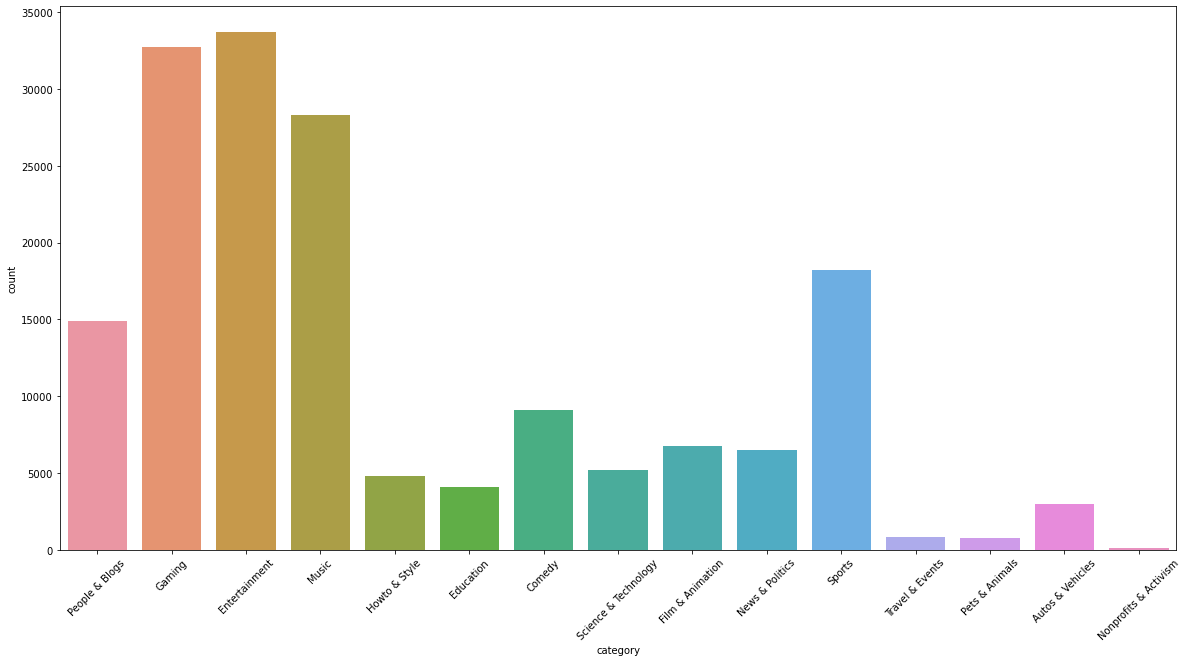

In [51]:
#countplot for category in US
plt.figure(figsize=(20,10))
sns.countplot(x='category', data=US_df)
plt.xticks(rotation=45)
plt.show()

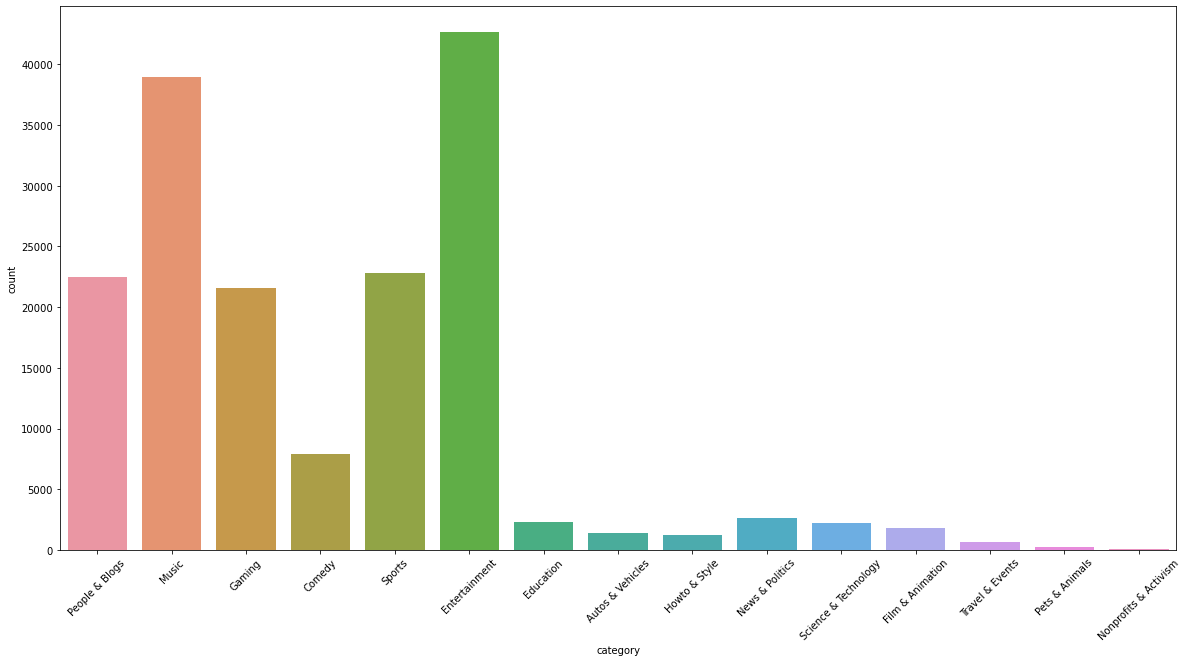

In [52]:
#countplot for category in BR
plt.figure(figsize=(20,10))
sns.countplot(x='category', data=BR_df)
plt.xticks(rotation=45)
plt.show()


In [ ]:
#compare category in US and GB
plt.figure(figsize=(20,10))
sns.countplot(x='category', data=GB_df)
plt.xticks(rotation=45)
plt.show()